In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [226]:
wine = pd.read_csv('../WineQT.csv')

In [227]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Träna en random forest

Jag kommer använda max_depth för annars blir min train overfitted.

In [249]:
x = wine.drop(columns=['quality', 'Id'], axis=1)
y = wine['quality']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [259]:
Randfor = RandomForestClassifier(max_depth=10)

In [260]:
Randfor.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10)

In [261]:
print(f'The train-score is: {Randfor.score(X_train, Y_train)}.')

The train-score is: 0.98875.


In [262]:
print(f'The test-score is: {Randfor.score(X_test, Y_test)}.')


The test-score is: 0.6588921282798834.


In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
Randfor.fit(x_train, y_train)
print("Accuracy:", Randfor.score(x_test, y_test) * 100)

Accuracy: 65.88921282798835


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Hur många träd finns det i skogen?

In [234]:
Randfor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [235]:
print(f'There is {Randfor.n_estimators} trees in the forest')


There is 100 trees in the forest


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Vilka attribut har störst påverkan?

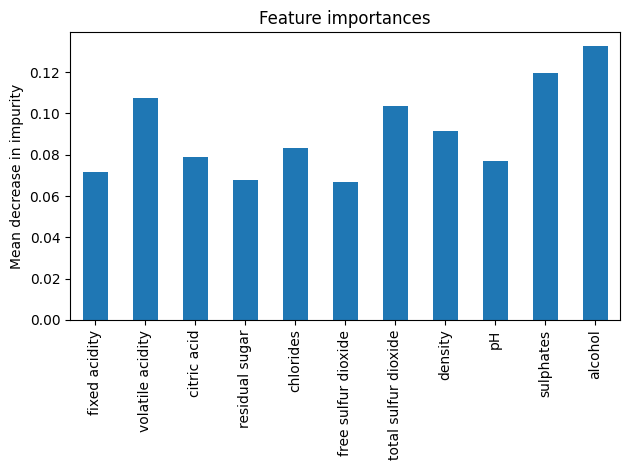

In [236]:
importances = Randfor.feature_importances_

forest_importances = pd.Series(importances, index=x.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

 Som vi kan se i stapeldiagrammet har följande attribut störst påverkan:
 - alcohol
 - sulphates
 - volatile acidity
 - total sulfur dioxide

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Vilka klasser har modellen störst problem med att klassificera rätt? Varför är det problem med de klasserna?


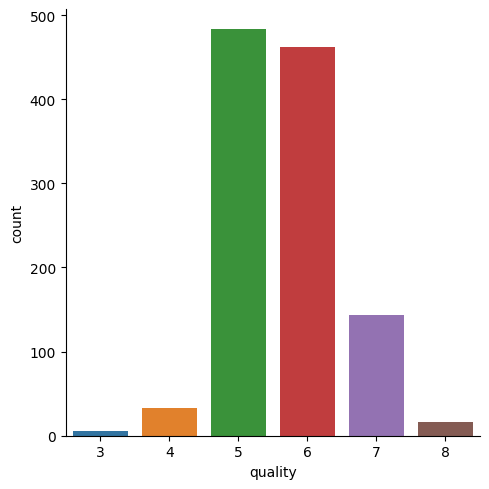

In [237]:
sns.catplot(x='quality', data = wine, kind = 'count')

In [238]:
wine['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Ovan ser vi att kvalitetsklasserna 5 och 6 har betydligt mer viner i sig än 3, 4, 7 och 8. Detta resulterar i att klasserna 3, 4, 7 och 8 har störst problem med att klassificera rätt. Anledningen till detta är att det är mycket mindre antal viner i dem klasserna. Detta gör att vi har mindre data att jobba med vilket i sin tur leder till att vi inte får en lika tillförlitlig accuracy samt att det blir svårare att träna och predicta på datan. Vi får även det bevisat på min confusion matrix jag gjort nedan

In [239]:
y_predicted = Randfor.predict(X_test)

In [240]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  0,   6,   3,   0,   0],
       [  0, 108,  34,   1,   0],
       [  0,  45,  95,   6,   0],
       [  0,   1,  17,  23,   0],
       [  0,   0,   3,   0,   1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

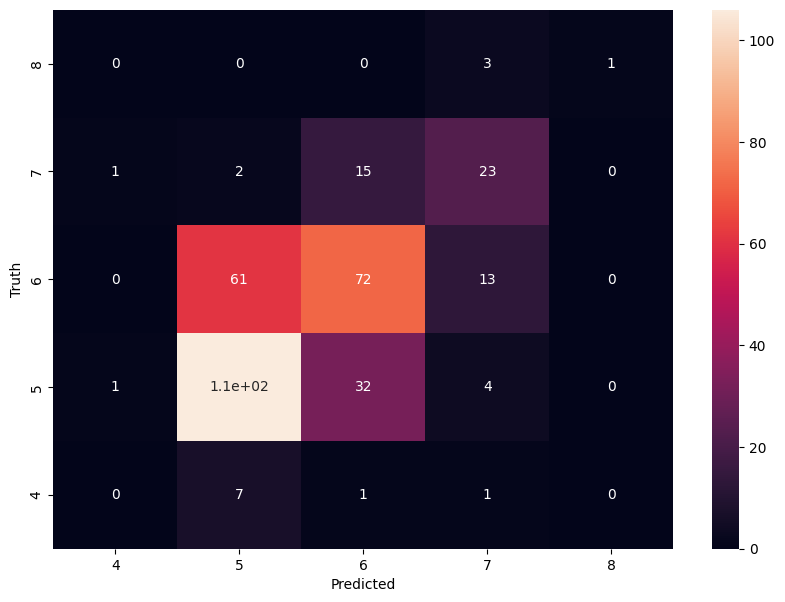

In [264]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, xticklabels=[4, 5,6, 7, 8],yticklabels=[4, 5,6, 7, 8])
ax.invert_yaxis()
plt.xlabel('Predicted')
plt.ylabel('Truth')

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### VG

###  Bygg en egen random forest genom att träna flera decision trees.
#### Tänk på hur du ska jobba med träningsdatan för att få olika träd och att testdata inte får läcka till något träd.

In [242]:
clf = BaggingClassifier(estimator=DecisionTreeClassifier(),
                        n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

###  Hur många träd har du i skogen?

In [243]:
print(f'I have: {clf.n_estimators} trees in the forest.')

I have: 10 trees in the forest.


### Vad får du för testscore? Skiljer den sig mot modellen du skapade i godkänt delen? I så fall, varför tror du den skiljer sig?

In [244]:
print(f'The test-score is: {clf.score(X_test, Y_test)}.')

The test-score is: 0.5889212827988338.


I godkänt delen fick jag ett test-score på 65% så det blev högre än scoret jag fick nu på 58%. Jag tror att det skiljer sig dels för att jag, i godkänt-delen, tränar hela skogen. Detta gör att jag har mer data att träna på. Nu har jag valt att göra en skog på endast 10 träd vilket gör att jag har mindre träd att träna på och därav mindre data.

### Vilka klasser har modellen problem med? Är det samma klasser som för modellen i godkänt delen?

In [245]:
y_predicted = clf.predict(X_test)

In [246]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[  0,   7,   1,   1,   0],
       [  1, 106,  32,   4,   0],
       [  0,  61,  72,  13,   0],
       [  1,   2,  15,  23,   0],
       [  0,   0,   0,   3,   1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

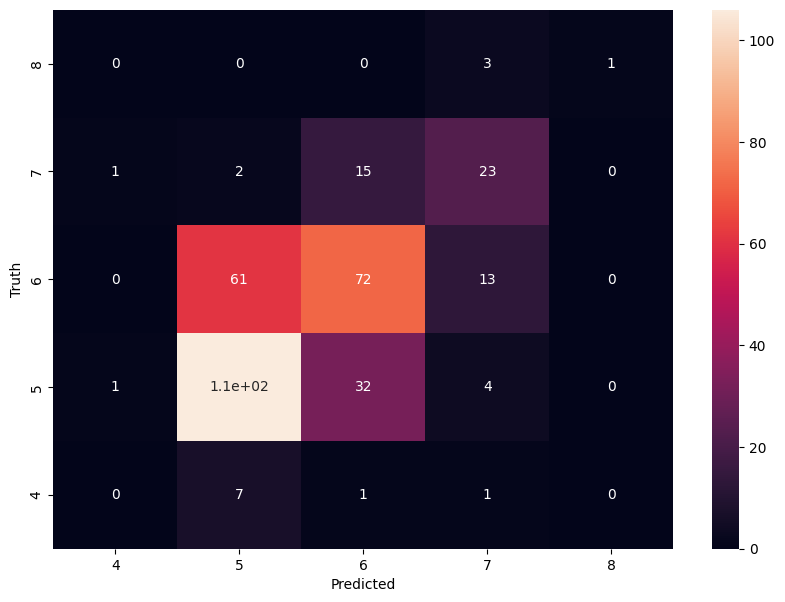

In [247]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, xticklabels=[4, 5,6, 7, 8],yticklabels=[4, 5,6, 7, 8])
ax.invert_yaxis()
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

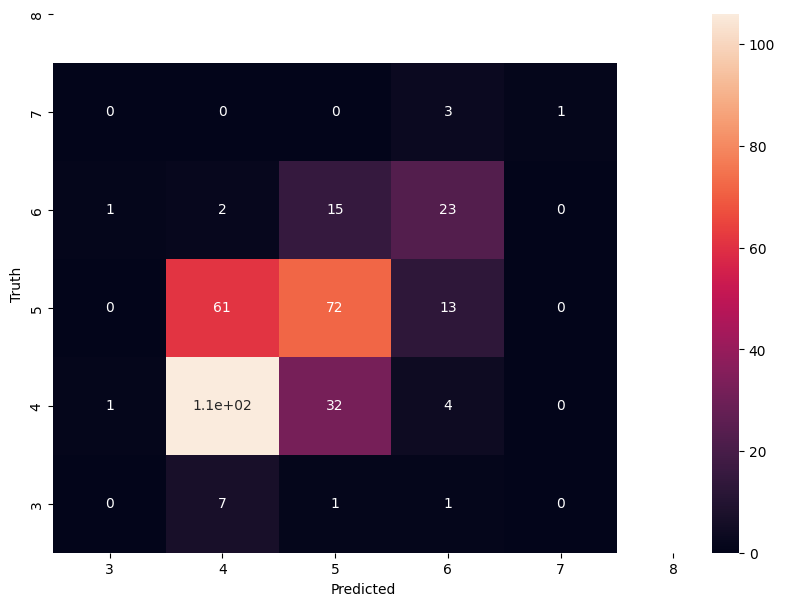

In [248]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(cm, annot=True, xticklabels=[3, 4, 5,6, 7, 8],yticklabels=[3, 4, 5,6, 7, 8])
ax.invert_yaxis()
plt.xlabel('Predicted')
plt.ylabel('Truth')

Som vi kan se så är det samma som på godkänt delen att där vi har mest data är på klasserna 5 och 6. Resterande är knappt med. Jag får bara 5 klasser när jag kör conufsion matrix (samma som i godkänt-delen) som vi kan se när jag lägger till klass 3 så får jag en tom rad på x och y-axeln vilket innebär att det är såpass lite data i klass 3 att den inte följer med.